## Overview
1. load Home and Kitchen data
2. select reviewers who left more than 5 reviews (115,673)
3. light preprocessing

In [32]:
import gzip
import nltk
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import re

from tqdm import tqdm

pd.set_option('display.max_colwidth', 600)
%matplotlib inline

In [35]:
def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

data = getDF('reviews_Home_and_Kitchen.json.gz')

## 1. Preprocessing

* 시간 순 정렬
* 최소한의 리뷰 개수 이상인 데이터만 거르기

In [43]:
def left_reviewerId_over_n(data, n):
    reviewer_dict = dict()
    for id_ in data.reviewerID:
        if reviewer_dict.get(id_): 
            reviewer_dict[id_] += 1
        else:
            reviewer_dict[id_] = 1
    over_n = []
    for id_, cnt in reviewer_dict.items():
        if cnt >= n:
            over_n.append(id_)
    return over_n

In [44]:
n = 5

In [45]:
reviewer_over_n = left_reviewerId_over_n(data, n)
print("reviewer whose number of reviews is over n: {}".format(len(reviewer_over_n))) # reviewer 수

reviewer whose number of reviews is over n: 115673


In [46]:
data_over_n = data[data.reviewerID.isin(reviewer_over_n)]

In [47]:
data_over_n.sort_values('unixReviewTime', inplace=True)

/home/jihyung/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [49]:
print("number of items in data_over_n: {}".format(len(set(data_over_n.asin))))

number of items in data_over_n: 194446


In [50]:
del(data)

### 1.1 text word indexing

In [51]:
lemma = nltk.wordnet.WordNetLemmatizer()

In [52]:
stemmed_review = []
for review in tqdm(data_over_n.reviewText):
    review = re.sub('\*+', '', review)
    review = re.sub('~+', '', review)
    review = re.sub('-+', '', review)
    review = re.sub('&quot;', '', review)
    review = re.sub('\&\#\d+\;', ' ', review)
    review = re.sub('_+', '', review)
    review = re.sub('([a-zA-Z]+)\.([a-zA-Z])', '\\1. \\2', review)
    stemmed = lemma.lemmatize(review)
    stemmed_review.append(stemmed)

100%|██████████| 980608/980608 [01:04<00:00, 15253.61it/s]


In [53]:
cnt = 0
while cnt < len(stemmed_review):
    review = stemmed_review.pop(0)
    review = re.sub('theprimula', 'the primula', review)
    review = re.sub('thicknessit', 'thickness it', review)
    review = re.sub('perfmance', 'performance', review)
    review = re.sub('brakfakst', 'breakfast', review)
    review = re.sub('readingsand', 'readings and', review)
    review = re.sub('appletinis', 'appletin is', review)
    review = re.sub('makerhas', 'maker has', review)
    review = re.sub('durablegood', 'durable good', review)
    review = re.sub('spacenegative', 'space negative', review)
    review = re.sub('beveragecons', 'beverage cons', review)
    review = re.sub('naturalnearby', 'natural nearby', review)
    review = re.sub('rugfeatured', 'rug featured', review)
    review = re.sub('cookingmeals', 'cooking meals', review)
    review = re.sub('againstallgrain', 'against all grain', review)
    review = re.sub('updatefirst', 'update first', review)
    review = re.sub('lotif', 'lot if', review)
    review = re.sub('sheetcakes', 'sheet cakes', review)
    review = re.sub('modelsrating', 'models rating', review)
    review = re.sub('versatilitycons', 'versatility cons', review)
    review = re.sub('frustrationcons', 'frustrations cons', review)
    review = re.sub('valueeasy', 'value easy', review)
    review = re.sub('puttoppings', 'put toppings', review)
    review = re.sub("don'tworry", "don't worry", review)
    review = re.sub('betterbut', 'better but', review)
    review = re.sub('fightersnice', 'fighters nice', review)
    review = re.sub('buttwhile', 'but while', review)
    review = re.sub('colderthan', 'colder than', review)
    review = re.sub('curtainsconsits', 'curtains cons its', review)
    review = re.sub('moppingalthough', 'mopping although', review)
    review = re.sub('receiversshelf', 'receivers shelf', review)
    review = re.sub('oldoak', 'old oak', review)
    review = re.sub('wasworried', 'was worried', review)
    review = re.sub('myaroma', 'my aroma', review)
    review = re.sub('thereplaicing', 'the replacing', review)
    review = re.sub('pleasingb', 'pleasing', review)
    review = re.sub('noisesturn', 'noises turn', review)
    review = re.sub('sanitizebuild', 'sanitize build', review)
    review = re.sub('andpulling', 'and pulling', review)
    review = re.sub('extractorinstead', 'extractor instead', review)
    review = re.sub('tocome','to come', review)
    review = re.sub('peppercombine', 'pepper combine', review)
    review = re.sub('ightweight', 'light weight', review)
    review = re.sub("ratingi've", "rating i've", review)
    review = re.sub('pilllowcase', 'pillow case', review)
    review = re.sub('toughbiggreenand', 'tough big green and', review)
    review = re.sub('smartypants', 'smarty pants', review)
    review = re.sub('metalworker', 'metal worker', review)
    review = re.sub('quiterealistic', 'quite realistic', review)
    review = re.sub('flimsyoverall', 'films overall', review)
    review = re.sub('shortervictorinox', 'shorter victorinox', review)
    review = re.sub('hungryhappenings', 'hungry happenings', review)
    review = re.sub('portableairshop', 'portable air shop', review)
    review = re.sub('elementis', 'elements', review)
    review = re.sub('designunder', 'design under', review)
    review = re.sub('adjustableinexpensivestainless', 'adjustable inexpensive stainless', review)
    review = re.sub('minutesbefore', 'minutes before', review)
    review = re.sub('breadbaking', 'bread baking', review)
    review = re.sub('somewhathigher', 'somewhat higher', review)
    review = re.sub('remotewith', 'remote with', review)
    review = re.sub('teapotthat', 'teapot that', review)
    review = re.sub('dishwashersafe', 'dishwasher safe', review)
    review = re.sub('paperthe', 'paper the', review)
    review = re.sub('grillpanthe', 'grill pan the', review)
    review = re.sub('setbonjour', 'set bonjour', review)
    review = re.sub('thewaiting', 'the waiting', review)
    review = re.sub('buyinghttp', 'buying http', review)
    review = re.sub('spacemy', 'space my', review)
    review = re.sub('asomething', 'a something', review)
    review = re.sub('mybonjour', 'my bonjour', review)
    review = re.sub('newlodge', 'new lodge', review)
    review = re.sub('lbsgross', 'lbs gross', review)
    review = re.sub('cleanupgive', 'clean up give', review)
    review = re.sub('teaupdate', 'tea update', review)
    review = re.sub('thefrench', 'the french', review)
    review = re.sub('eggwater', 'egg water', review)
    review = re.sub('rollerto', 'roller to', review)
    review = re.sub('thesecons', 'these cons', review)
    review = re.sub('fridgethe', 'fridge the', review)
    review = re.sub('overpricedthese', 'over priced these', review)
    review = re.sub('freshmakes', 'fresh makes', review)
    review = re.sub('slowwwlllllyy', 'slowly', review)
    review = re.sub('12below', '12 below', review)
    review = re.sub('installedto', 'installed to', review)
    review = re.sub('bagscons', 'bags cons', review)
    review = re.sub('vacuumwhcih', 'vacuum which', review)
    review = re.sub('ergonomicsfolds', 'ergonomics folds', review)
    review = re.sub('stationboth', 'station both', review)
    review = re.sub('gotthe', 'got the', review)
    review = re.sub('batteriescons', 'batteries cons', review)
    review = re.sub('bakerhttp', 'baker http', review)
    review = re.sub('getsmy', 'gets my', review)
    review = re.sub('myhoover', 'my hoover', review)
    review = re.sub('tacoproper', 'taco proper', review)
    review = re.sub("it'sonly", "it's only", review)
    review = re.sub('steelmeasures', 'steel measures', review)
    review = re.sub('technologypanasonic', 'technology panasonic', review)
    review = re.sub('spiritsdate', 'spirits date', review)
    review = re.sub('knowwhen', 'know when', review)
    review = re.sub('toturn', 'to turn', review)
    review = re.sub('gettingit', 'getting it', review)
    review = re.sub('filtersbrush', 'filters brush', review)
    review = re.sub('onereason', 'one reason', review)
    review = re.sub('gradeproduct', 'grade product', review)
    review = re.sub('handlesthe', 'handles the', review)
    review = re.sub('capthere', 'cap there', review)
    review = re.sub('warrantyyou', 'warranty you', review)
    review = re.sub('veggiesthere', 'veggies there', review)
    review = re.sub('deepupdated', 'deep updated', review)
    review = re.sub('betterthis', 'better this', review)
    review = re.sub('filtersthis', 'filters this', review)
    review = re.sub('sohelpful', 'so helpful', review)
    review = re.sub('absolutelya', 'absolutely a', review)
    review = re.sub('bladefor', 'blade for', review)
    review = re.sub('beachcamera', 'beach camera', review)
    review = re.sub('teawith', 'tea with', review)
    review = re.sub('properlyconsneeds', 'properly cons needs', review)
    review = re.sub('paintedcons', 'painted cons', review)
    review = re.sub('offlaking', 'off laking', review)
    review = re.sub('theset', 'the set', review)
    review = re.sub('thiseven', 'this even', review)
    review = re.sub('bitsthere', 'bits there', review)
    review = re.sub('siloconvert', 'silo convert', review)
    review = re.sub('riiiiight', 'right', review)
    review = re.sub('nicelywhen', 'nicely when', review)
    review = re.sub('easethis', 'ease this', review)
    review = re.sub('struggleoverall', 'struggle overall', review)
    review = re.sub('tubesuction', 'tube suction', review)
    review = re.sub('steamthe', 'steam the', review)
    review = re.sub('mustardsalt', 'mustard salt', review)
    review = re.sub('withbrownie', 'with brownie', review)
    review = re.sub('pricecons', 'price cons', review)
    review = re.sub('arrivedthe', 'arrived the', review)
    review = re.sub('asharpening', 'a sharpening', review)
    review = re.sub('andforefinger', 'and forefinger', review)
    review = re.sub('downnaturally', 'down naturally', review)
    review = re.sub('underneathsummary', 'underneath summary', review)
    review = re.sub('jusssst', 'just', review)
    review = re.sub('shoulderbags', 'shoulder bags', review)
    review = re.sub('pepperdirectionscook', 'pepper dirctions cook', review)
    review = re.sub('homemadecookiesandmore', 'homemade cookies and more', review)
    review = re.sub('favoritewest', 'favorite west', review)
    stemmed_review.append(review)
    cnt += 1

In [65]:
# add '.' to review
for i, review in tqdm(enumerate(stemmed_review)):
    if review.startswith('I recently upgraded from aGE Spacemaker XLwith the purchase of an LG overtherange microwave'):
        stemmed_review.pop(i)
        corrected = "I recently upgraded from aGE Spacemaker XL with the purchase of an LG overtherange microwave 2 cubic ft., black, item number: LMV208SB. the Good attractive to look at, matches my kitchen decor perfectly. large LCD display is easy to see and read. includes many advanced and basic settings. has an 'EZON' feature which allows you to start cooking instantly with the press of this button. has dedicated buttons for popcorn and hot dogs. door opens on its own, there isn't another button that you need to press like on other microwaves for the door. the price was exceptional and with Amazn's free shipping. I defy anyone to find another retailer that can match their price. comes with a 1year warranty and if LG is anything like GE (I have no idea) they won't bat an eye if you call them for service even when the appliance is a few years old More/Less. Arrows allow you to subtract or add time while the microwave is in operation. tells you when to turn over food, when you're defrosting. extra large cooking capacity, and with the wrack it nearly doubles in size 1100 watts of power. the Bad it is incredibly heavy and bulky (nearly 70 pounds), have at least 2 strong men who can lift it when you install it. the door makes a loud clunking sound when it closes. there isn't a 'quick cook' button like GE had, the closest this has is EZOn, however that automatically defaults to 30 seconds the unit. doesn't constantly keep beeping to remind you that your food is ready. sometimes foods tend to get slightly soggy when taken off the 'hold warm' setting. the rotation cannot be turned off if it is set to keep warm. it's doing a number on my plastic dishes that are microwave safe, they're slightly bending, however since they're so inexpensive I do not mind too much. the Ugly it is a beast to clean/keep clean. it is a fingerprint/dust magnet picks up streaks very quickly. it can pick up scratches very, very easily. the Exceptional the Soften button allows you to soften butter, icecream, cream cheese and even frozen juice with the cooking sensors. the microwave cooks everything to the perfect temp and then shuts off automatically, this is great for TV dinners. with the Reheat button you can quickly heat up anything and the microwave will bring it to the perfect temp without any effort on your part dedicated. defrost settings for vegetables, beef and chicken with the Hold Warm button. I can now leave whatever I was cooking in it for up to 90 minutes and it will stay nice and hot, this'll save on power because I won't have to turn on the oven for this. able to automatically turn on the Hold Warm feature to follow another cooking function. EZOn feature can be extended in 30 second increments just by pressing it. Custom Cook can be programmed to cook any single time you use the most often (my only complaint about this is you still need to press the Start/Enter button). Things to Remember never use a brillo pad or abrasive sponge on this as it could scratch very easily. although I don't know why you would want to, never turn the microwave oven on if nothing is inside it. when you first get it, sometimes it makes slight crackling sounds as it's in operation, these are normal when this arrives. it will look HUGE in the manufacturer's box, don't worry that's just how it looks in the box. If anyone has any suggestions on how to keep this looking perfect and nice and shiny and glossy please let me know."
        stemmed_review.insert(i, corrected)
    elif review.startswith('This Microwave oven gets my highest rating even though Amazon only allows for five stars'):
        stemmed_review.pop(i)
        corrected = "This Microwave oven gets my highest rating even though Amazon only allows for five stars. the oven is extremely fast and has the largest capacity for the price, also the quietest microwave oven I have ever heard or owned. I am amazed at the speed of cooking and reheating it can do and Amazon has the best and lowest price of any website I researched on. oven has a clock which was not stated on the description on the amazon page where it is located on. there is however downfall to this microwave oven which I was very surprised to. have witnessed for such an innovator of this type of oven they are known for their carousel that it did not have a luud beep when the oven is finished cooking or reheating. you really have to be in a room that is very quiet to hear this beeping sound for when the oven is finished. but all in all great oven great price and lots of cooking and reheating settings and loads of interior space. I was even able to put a Visions cookware pot in there without damaging the sides of the oven while the turntable is in motion which I thought I would not be able to do prior to receiving the oven. I did have a concern that I would not be able to use this particular pot in there because of damage it could cause. but I was pleasantly surprised I was able to put it in this oven If you own a lower wattage microwave oven and you purchase this one. you will also need to adjust your times by at least half the amount you already use on your current oven. I also love the minute plus setting, if you make a mistake in your time you can press this button to add one more extra minute. everytime until you reach the desired time, it is very handy if you are not sure just how much more time you need with your cooking and don't want to have to go all through the steps again to reset and start over. this button is so easy. just one press and you get an extra minute. I completely recommend this Microwave oven ot everyone, I just hope it last twenty years like my old Amana microwave did."
        stemmed_review.insert(i, corrected)
    elif review.startswith('this was very easy to put togetheri like the suction on itit is much better than'):
        stemmed_review.pop(i)
        corrected = "this was very easy to put together. i like the suction on itit is much better than my other dirt devil. it is easy to use pretty light weight. it glides across the floor easily. there are a few things i do not like. wish it had a light on it for when i am going under things. i am so used to every other machine i have has one but this one does not. the wand is a bit klunky to take out to use it. i keep hitting myself on the plastic part that holds the hose when it is upright. as for the dirt cup i have yet to find any machine that i do not get a bit dirty when i have to empty it. this one if i just remember to dump it every single time i use it. then it is not so bad but when it gets clogged up and i have to stick my hand in there to twist it apart and let the clog get out then it is a huge mess. it is a bit odd where the cord comes out from the machine too close to the bottom of it and i have to keep picking it up to be sure not to run over it. seems like it could have been up above the on button. that is another issue with this machine. you have to put your foot in front of it to flip it down to use it. why not just have the down pedal in the back? we rarely use the dusting part of it. i was so excited to try this feature because we have butternut walls and ceilings all over our house to my dismay this feature is kind of a pain and just easier to get out my dust mopi give it three stars because there are simply too many downsides to overlook and i hope they improve on these things. overall the suction is really good so for daily cleaning of my carpets it is great. i just have learned to not use the wand much or the dusting feature"
        stemmed_review.insert(i, corrected)
    elif review.startswith('have been using this mattress for a month nowlove it!one thing it will be hard to get used to not having'):
        stemmed_review.pop(i)
        corrected = "have been using this mattress for a month now love it! one thing it will be hard to get used to not having to flip it though. i admit i am a flipper and our last mattress was over ten years old and i was always flipping it hoping to move the sags around. but this one i do not think will end up sagging like the other one did. it has a higher coil count than my last one did. so far this one i have no complaints of any kind for being able to get a good nights sleep. I am able to sleep and not wake up with a back achei did have to get new sheets though. thought i already had ones for deep pockets but they were not deep enough for this oneone tiny complaint i do have. it is harder to change the sheets. the material on the box spring and bottom of the mattress stick to each other instead of kind of sliding around and i wish the fabric on the boxspring was not so thin or fabric paper like. oh our older boxspring it was more like a waterproof tarp type material and not a single rip in it after ten years. this one came with a couple small tears in it so when i change the sheets have to lift the mattress up and move it around since it does not slide back into place at all. it is a softer bed just like it says plushso if you are looking for firm this is not going to be that bed for you."
        stemmed_review.insert(i, corrected)
    elif review.startswith('I got this set in may this year after much research and knowing that using nonstick cookware over yearsssss can lead to cancer ..'):
        stemmed_review.pop(i)
        corrected = "I got this set in may this year after much research and knowing that using nonstick cookware over yearsssss can lead to cancer. horrible and that too my nonstick started to loose its coating and no wonder it would be going directly into the food we eat. it was at that point where i decided to go with MCP stuff. i chose MCP instead of classic because i felt MCP set is more suitable for my cooking, since we almost cook everyday and when u weigh the MCP in one hand and classic in other hand. u could feel MCP is a bit heavier and so bit better. anyways that how i feel. one of my aunt said the heavier the pan the better it gets. so i ordered on amazon for 218 bucks and started using immediately, i just spray pam on the sautee pans and throw in some veggies and spray a spritz of olive oil over veggies and set in medium heat and they get done so perfectly and EVENLY. i love that it cooks food so evenly, unlike my other nonstick stuff and also the lids are quite handy. only thing you cannot rise heat more than medium unless you are boiling water. but that's no biggie for me. i got used to it. since once the pan is heated it cooks fast even in medium. i just love the steamer attachment. it gives me such perfectly steamed veggies and i use little pan for eggs and cleaning is unbelievable, i am some one who always dumps every small thing in a dish washer but coming to MCP set i clean it myself. it's that easy. i just put a drop of dishwasher detergent on the pan and fill it with HOT water and come back when ever i am passing by the kitchen and just rinse it away and every things washes away no matter how much tough marks or stains it has and it shines like those cook wares shown in cook shows. sometimes i forget to wash that day and wash the next day ot day after but it comes out just perfect when ever you wash. in fact you can proudly display them in the kitchen."
        stemmed_review.insert(i, corrected)
    elif review.startswith("I am not Italian, nor have I ever had much interest in pasta...Well I always bought it out of a bag at the grocery store ,it wasn't to good to my palate or my friends..."):
        stemmed_review.pop(i)
        corrected = "I am not Italian, nor have I ever had much interest in pasta. Well I always bought it out of a bag at the grocery store, it wasn't to good to my palate or my friends. so I am learning to make fresh pasta. the problem is not the machine as it is a solid piece of metal and does what it says it will do. the problem is with me making the dough. however you must be able to make a dough that will work. ha ha. I am working on that. The machine is made of good steel and works well. will last a long time. I will be able to make a dough soon that will work. the dough that I tried was a water and all purpose flour to make ravoli it broke in the ravoli maker I bought also. but think my dough would have worked for everything else the machine does. Hey I am not putting this machine down as it is constructed of heavy metal and will last me a lifetime and pass on to kids and then to grandkids. the pasta maker is not the problem. I need to learn to make a dough. I have bought many items from Amazon. I think if you love to cook like I do you cannot go wrong with this machine as it is awesome, and does what it says it will do. I have had some pasta from it and fresh is better. who knew. I did't. sorry. don't know what to call the stuff I made as it was like a spaghetti as the strands were thicker and then I made an  angel hair I think. fresh is better and I am not Italian. I live in the south and have begun to think of ways to make dumplings or maybe some apple pies. hey this thing is awesome and let the mind take you away to a food frenzy of delight only your pocket book will stop you cold. but this item is priced right as it will last a long time. I haved told you my experience with the machine I bought and my expectations. yours may be different. but I am totally happy with my purchase."
        stemmed_review.insert(i, corrected)
    elif review.startswith("I got this after I read all these good reviews..well sorry to say i ain't to pleased with mine..i tried cooking a inch an a half fat polishsausage.."):
        stemmed_review.pop(i)
        corrected = "I got this after I read all these good reviews. well sorry to say i ain't to pleased with mine. i tried cooking a inch an a half fat polishsausage. well these things barely fit on the rollers and scraped the heating element on top. needless to say i didn't get to try them out anhad to take them off. So i had some foot long nathan's hot dogs in the fridge and figured i try them. well they fit and turned easy and i followed there instuctionson how to cook them. but they came out tuff and all dried out not plump and juicy. i have a cheap hot dog roller by nostalgia that does a betterjob than this thing. you see on that thing the ROLLERS get hot and cook the dogs. on this thing the heating element on top bakes them and therollers just turn the dog around. it makes a hell of alot of difference believe me, I should have just went with a hot dog roller machine insteadof this thing. as far as the griddle goes this thing gets EXTREMELY HOT so i'm sure it would be good for steaks an what not. But i bought it for the hot dog thing and am really disappointed in that part. so don't think you can cook any kind of round sausage on this thingcause you can't. forget the bratwursts and the polishs, and the italian sausages and any other kind unless there less that a inch fat. i must saythough the clean up on it was a breeze came clean with a scrubber pad no problems. all in all if your looking for something to cook sausages onthis ain't it. if your looking for a smoking hot griddle this is your baby. any body want to buy a once used griddler grill cheap."
        stemmed_review.insert(i, corrected)
    elif review.startswith("OK ITS GREAT MAKES LARGE AND THIN FRIESITS MECHANICAL"):
        stemmed_review.pop(i)
        corrected = "OK ITS GREAT. MAKES LARGE AND THIN FRIESITS MECHANICA.L SO YOU HAVE TO PUSH THE HANDEL. YOU REALLY SHOULD MOUNT IT DOWN OR TO A WALLI USED RED POTATOES AND IT WORKED VERY WELL. REGULAR WHITE WORKED VERY WELL. HAVE NOT TRYED CARROTSOR OTHER THINGS LIKE IN MAKING A SOUPITS PART THAT PUSHES THE POTATO INTO THE CUTTERREALLY PUSHES IT ALL. THE WAY THREW YOU GOING TO HAVE TO PUT A DISH OR SOME THING TO COLLECT THE CUT FRIES ECTI. BELIVE ITS WELL MADE THE BLADES ARE N0T LIKE RAZORSHARP BUT GOOD ENONF FOR WHAT ITS IS FOR. DONT FORGET TO MOUNT IT DOWN. IT WILL WORK EASYER. I JUST HAVE NOT GOTTEN AROUND TO MOUNT IT DOWN YET ALSO. AMAZON SELLS A LITTLE SMALL DEEP FRYER THAT USES A CUP OF OILAND. I COOK EVERY THING IN IT WHITING FISH CAKESFRIES KIND OF EASY TO CLEAN. REMEMBER IT USES A CUP OF OIL SO YOU CAN CHANGE THE OIL OFTEN RATHER THAN THOES. BIG DEEP FRIERS THAT USE LIKE A HALF GALLON. IT ALSO HAS A TEMPUTURE SETTING. WELL IT JUST GOES WELL WITH THIS CUTTER. I MUST SAY WITH THESE TWO ITENS I COULD REALLY COOK UP A STORM. HAVE YOU EVER DEEP FRIED FISH CAKES OR FISH STICKS MADE A SANDWITCHWITH LETTUCE TOMATO MAYO KETCHUP OR BREADED SHRIMPPOP THEM. IN THIS DEEP FRYER I EVEN MADE BUTTERFLYSHRIMP WITH BACON IN IT. NOW THERE SOMETHING TRICKEY TO MAKE WELL. YOU'LL HAVE A BLAST WITH THESE ITEMSDEEP FRYED EGG ROLLS. WELL I GOT TO GOCHOW."
        stemmed_review.insert(i, corrected)
    elif review.startswith("They are so pretty and bright and neat and useful but when I got it the handle on the strainer was broken so I was sad so I told Amazon"):
        stemmed_review.pop(i)
        corrected = "They are so pretty and bright and neat and useful but when I got it the handle on the strainer was broken. so I was sad. so I told Amazon and they said do sorry we will send someone to get it from you and send another out. but print this label and I go oh no I had no printer. so I got sad again and I called and they said its OK the ups will bring it instead and I said yay and I was happy and my new one came and it was good and not broken. and later the ups came to get it and I said I have no tape either to close the box and he said its OK and he would tape it. so I was happy and then I tried the set. it was great too and bright and it all fits together perfect. and the only thing I wish it had too was a middle size bowl. but then something would be maybe left out or the big bowl would be to big or the little bowl too small. but they aren't and its awesome and if you want me to stop rambling just buy it and run around the complex of your tiny apartment showing all of your neighbors your awesome new kitchen set. and this out all of your old space taking up not fitting together crap or give it away like I did and be happy and have a free cabinet and get the magnetic utensil set and have a free kitchen drawer to put your towels and oven mitts in. so you can find them and have counter space!"
        stemmed_review.insert(i, corrected)
    elif review.startswith("I have been sleeping on memory foam mattresses as soon as the knockoff ones were made.....my parents and grandparents both have"):
        stemmed_review.pop(i)
        corrected = "I have been sleeping on memory foam mattresses as soon as the knockoff ones were made. my parents and grandparents both have the expensive one that is advertised everywhere. but they have a larger budget than I do. .so I can tell you these mattresses are really evolving. that can be good and bad. technology can make things better for us, but sometimes things changing does not mean they are better. in fact sometimes they get worse. in this case, memory foam is evolving in a better way but the process to find the one for you is becoming more time consuming and frustrating. there are soooo many choices how do you know which foam is best?  1, 2 , 3 or 4 in?. gel infused?. regular foam?. 8,10 or 12 in?. I mean the choices are endless. and that is the part that gets to me. I spent nearly a total of 30 hours researching and comparing. and I know alot about these things. and it still took me that long. I can tell you my grandfather told me when I was a kid something I never forgot he said 'you spend 1/3 of your life sleeping, so you should make sure you find a good bed, it will help determine the quality of your life, health and happiness, so don't skimp on a good bed!'  He was right. but what is a good bed?  That is really up to each person. Here is what I did this time looking for a new mattress. 1.  Went to a mattress store.  Laid down on nearly all the mattresses and took notes.  I already knew I wanted a higher thickness like 12 inch, but I wanted to test the new gel infused beds, the latex beds and the expensive ones. then I tried the knockoffs. and wrote down my findings. I know sounds bizarre, but it works for me. it would not work for my husband he would just go in and buy the first one that felt good and we would have ended up spending nearly $2000.00 instead of $300.00. so that is why I go alone!!2.  I came home and did a search for 'what to know when buying a memory foam mattress.'  What this did is give me all the current information on the type of foams they are making now and what the specs are (what is the difference between a 3 inch and 4 inch foam?. what  is the difference between a 10 inch and 12 inch bed?. differences between densities of foam?). This them helped me determine that I wanted a bed to last longer than many beds, I need a firm bed for my back, hips, shoulders and knees, I wanted something that would keep the firmness yet provide support and be comfy. sounds like I wanted everything. oh yeah. and not break the bank!!. I learned that the higher the bed, the more likely it will last longer, the thicker the top layer of foam is with a density of at least 9, the longer the memory foam will stay firm. 3.  Now that I knew the type of bed I was looking for (firm, 12 inch height, 4 inch first layer of foam with a density of at least 9). .I went to Amazon to see what they had for sale. I found several. I then narrowed them down by price. from $200500. among these I looked at the reviews. and just because many people have purchased an item and it has several good reviews does not mean that is the best mattress. actually this one had the fewest people purchase it but the highest reviews out of those few people. so, now I had about 3 beds that me this criteria. 3.  I checked online in a search to find out the best memory foam mattresses consumer reports and other entities have put on the web, and found a few that matched up with the ones I had found on Amazon. .however, none of them matched up with this one. nearly all those other beds were higher in price, did not have the density I was looking for or were not 12 inches. 4.  So, out of all the beds, I had 3 to choose from, I looked on other sites to compare prices and I can tell you Amazon beats everyone hands down. even the big discount retailer (wally world). where I have purchased mattresses from before, did not compare to Amazon in terms of price or shipping time. .So why this mattress?. I can tell you that the 12 inch provides all the support I need and the longevity I am looking for. this mattress was one of the few on Amazon that actually states the density (which is critical to knowing how firm it really is). and I also checked the company's website to verify the firmness. and the 4 inch top layer with and ILD 9 (density). proved it was going to be firm and stay firm for years. my husband lives in a different state and his memory foam mattress is only a 3 inch and 7 ILD and we got it about 2 years ago and its starting to sag already. and he is not even a very big guy. so that will be the lst 3 inch 7 ILD that I buy. .AND as a BONUS. this mattress was only $254.99 on Amazon. with free shipping. I mean you just cannot beat it. most ILD 9 / 4 in. foam mattresses start at $500 and go way above. After this got delivered ahead of schedule, it came in rolled up in a large what appeared to be a duffle like bag.  Easy to open and immediately started taking shape.  I can tell you that nearly all my other mattresses have had the 'horrible' chemical smell for weeks after opening. but this one had about a day of it and it was gone. no more smell. that was nice. I did let it take shape for 3 days prior to sitting or laying on it. its important to do this so you do not impede on its taking full shape. if you lay on it too soon, you may see a sag in that part and it may never come to its full size. I know when you get something you want to use it right away. but you need to allow these to take full shape. it says 2 days, but I always allow for another full day. I would also recommend as others did, you open it up where you want it placed. once it has taken shape its not so easy to move unless you have help. and there are NO mattress handles on the side like other mattresses. Also, in terms of memory foam being 'hot' to sleep on. I sleep 'hot' myself and I have not noticed this is any hotter than any other mattress I have ever slept on. I have tshirt sheets and a thin blanket for summer, but I do not feel this gets hot at all. all memory foam will sink when it gets warm, but even by me sleeping 'hot' this one still stays firm. and its August so you know if it works in August, it will work in any other time of the year. August in Idaho is HOT!!!. .when I tried the gel infused mattresses or the ones that have multi layers with air cylinders that 'they claim will allow the foam to breathe better and air to flow through so you will not get so hot'. I found several places online that say that is just not true. and I did not notice any difference when I was trying out the beds at the stores. it is important that you have cotton sheets and cotton pillow cases because cotton is cooler than raymee, rayon, polyester, etc. I can ASSURE you. this is the BEST OF ALL MEMORY FOAM MATTRESSES I have EVER OWNED!!!. it is exactly what they say it is Firm yet soft. It provides ALL the support I need. yet it cradles you. I don't toss or turn, yet I don't sink either. great price. and quick shipping. NOT ALL MEMORY FOAM IS THE SAME. .so take the time to do the research for your own body. as I would never prescribe this bed for everyone, I know what I like and need, and this one is it for me!!. making sure you do your research BEFORE buying really pays off. Going to buy another for our camper. UPDATE 8/22/2013:  Someone asked me a question about the firmness of this mattress and the different weights of people. I can tell you I did respond in the comments section but I thought I would also put the response here. I weigh around 200 lbs and my husband less. so, I really needed a firm mattress for my body weight. if I lay on a bed that has no support I can tell you my hips, shoulders and back hurts like heck. so, this mattress fully supports me at my weight. some people that weigh less have complained in online reviews they feel the mattress is TOO FIRM. but my husband I believe weighs around 155 and he never has complained. he does have his own mattress (since he lives in Nebraska for work purposes and I live in Idaho). his mattress is not as dense of foam and that mattress is sinking already. he complains about his back hurting some mornings. he too likes a firm mattress. so when he visited me in Idaho last week and slept on this mattress, he thought it was GREAT!. even if he weighs less than me. as I said, he said too that this mattress even if its firm, its comfy. strange but true. I also wanted to point out an issue that I forgot in my initial posting. memory foam mattresses react different in different climates. for example. I have lived in Hawaii where the humidity is higher than it is in Idaho. and in a climate that is more humid the mattress will absorb that moisture and be less firm. this is why I felt its even more important to get a mattress with a higher density so it will stay firmer even in high humidity areas. I can tell you if I turn on my humidifier in Idaho, this particular mattress is NOT affected by the level of humidity. it still has remained firm yet comfy. again I believe this is due to the density of the top layer of foam. the higher the density the more firm it will remain. the less dense, the more it will allow moisture in and absorb it making it softer. .the last time I was in Nebraska visiting my husband and I slept on our older foam bed there, I woke up and thought my back was broken. I kid you not. I was miserable all day. its so humid back in Nebraska and the memory foam mattress he has is not as dense or thick. so it really absorbed the moisture in the air and was way too soft for me. I sank into it and my back suffered the entire next few days. the next night I slept on the couch and the firmness of the couch was better than the softness of the bed in that humid climate. STILL LOVIN THIS BED. ordering one for hubby soon and our camper!!!UPDATE 9/2/2013:COUNTRY OF ORIGIN:  Someone emailed me in the comment section and asked where this mattress was manufactured.  It says Country of Origin is China.  I would love to purchase USA products too, however, I learned years ago that even thought something says 'Made in the USA' it maybe put together here with materials from all over the world.  I did research beds that have been 'Certified' Made in the USA, and they either did not have the density of this mattress but were still way out of my price range.  I did also run into some of the Made in the USA mattresses that cannot guarantee the chemicals they spray on the mattress to be in compliance with the fire standards, come from the USA. so, I had to prioritize my wants and needs and what was most important to me was 1) comfort (being firm enough), 2) price and 3) as many nontoxic materials.  I did read a few people said there was not a horrible smell like other memory foam mattresses, and in my research, that is a good sign of fewer chemicals in the mattress. WARRANTY:  With respect to the warranty, I don't pay too much attention to those anymore, after the horror stories I learned about people trying to file a claim under a warranty. Not to mention the cost of returning it to the manufacturer is the buyers cost. That is why I wrote my initial posting, it really is all about the denseness of the foam. The more dense the foam the longer it will last. irrespective of the warranty. UPDATE 2/21/2014:We purchased another one of these for my husband who lives temporarily in the midwest for work.  Its very humid where he lives.  We have not noticed any difference in the mattress even with it being in a more humid climate in the midwest.  We are still very happy with these mattresses. I would remind those people looking to purchase or those who have purchased one prior, to make sure you place this mattress on a firm foundation/box spring.  They are not made to sit atop something that is not firm.  We did not have access to our boxspring one night and we placed this on top of another (spring) mattress so we did not have it on the floor directly.  However, after just a few hours, we noticed a significant difference in the firmness of the mattress. It became uneven and we sank into it.  Once we put it on the floor directly, it was fine and firm again. Also, we took off the cover and washed it.  It really washed up nicely.  I had one mattress before that when I dried the cover in the dryer, it shrank so small that I could not get it to fit the mattress anymore.  This cover did NOT do that.  It stayed the same size and went back on easy."
        stemmed_review.insert(i, corrected)
    elif review.startswith("I was looking for the perfect bathroom garbage to match the stainless"):
        stemmed_review.pop(i)
        corrected = "I was looking for the perfect bathroom garbage to match the stainless steel accessories in my bathroom.  and I was browsing on amazon and came across this cute little number. when I first took it out the box I was surprise at how small it was. it shock me for a minute because you know when you are expecting. some thing to be a certain way and size that will get you for a minute but that does not matter. I think the size is perfect for the little space. I have it for so cute that add to the beauty of it.  it gives the garbage a special look it fit quite nicely under the long dress mirror on the bathroom  wall. I love it.  they say it is fingerprint proof and they are correct because you know stainless steel has a problem with keeping prints. you always have to be cleaning and the finish on. it is so smooth that's a plus.  they also included two off their company garbage liner for you to use.  it is the right size for it the total package  and if you want to order additional liners for it you can get it from them.  they have their info in there the lid is so easy to open  just a touch on the lever and that's it pop not a sound. I couldn't be more please with this purchase shipping was also very fast will definitely order again thanks amazon."
        stemmed_review.insert(i, corrected)

980608it [00:02, 404524.46it/s]


In [55]:
def split_to_sent(reviewText):
    """
    reviewText to list of sentences
    """
    reviewText = re.sub('([a-z]+)([A-Z]+)', '\\1\. \\2', reviewText)
    reviewText = re.sub('\s\.\s\.', '', reviewText)
    reviewText = re.sub('\s\s', ' ', reviewText)
    pattern = re.compile('(?<=\.|\?|\!|\;|[\d\)])(?<!\w\.\w.)(?<![A-Z][a-z]\.)\s')
    sents = re.split(pattern, reviewText)
    return sents

In [66]:
# want to know sent_len distribution
sent_len = []
for review in tqdm(stemmed_review):
    sents = split_to_sent(review)
    for sent in sents:
        sent_len.append(len(sent))

100%|██████████| 980608/980608 [01:17<00:00, 12607.71it/s]


(array([  4.03548300e+06,   2.16678800e+06,   3.99951000e+05,
          6.62150000e+04,   1.47340000e+04,   4.31400000e+03,
          1.44300000e+03,   6.20000000e+02,   3.03000000e+02,
          1.58000000e+02,   8.10000000e+01,   5.10000000e+01,
          1.70000000e+01,   2.10000000e+01,   8.00000000e+00,
          7.00000000e+00,   5.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00]),
 array([    0. ,    70.4,   140.8,   211.2,   281.6,   352. ,   422.4,
          492.8,   563.2,   633.6,   704. ,   774.4,   844.8,   915.2,
          985.6,  1056. ,  1126.4,  1196.8,  1267.2,  1337.6,  1408. ]),
 <a list of 20 Patch objects>)

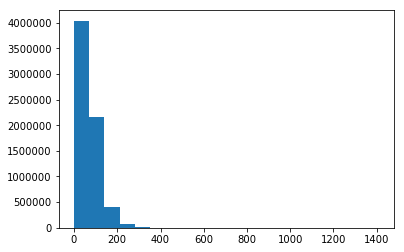

In [67]:
plt.hist(sent_len, bins=20)

In [68]:
for i, review in tqdm(enumerate(stemmed_review)):
    sents = split_to_sent(review)
    for sent in sents:
        if len(sent) > 1200:
            print(i)
            print(review)
            print('--')
            print(sent)
            print('============')

177453it [00:18, 9470.80it/s] 

176257
Be warned: this is a LONG review (didn't realize HOW long when I first wrote it!), since I tried to hit all the main points of the Kaldi, but I'm hoping the surplus of info on each point proves helpful! Update I recently discovered that my local bed bath and beyond now carries these capsules (Virginia Peninsula region), which clearly makes it much easier to restock my favorite flavors. I was also happy to see that the capsules now include at least three new flavors: Hazelnut (regular and decaf), Butterscotch Toffee, and French Vanilla, all three being mildstrength flavored coffees. Additionally, I saw that the packaging has been changed on the French Vanilla and Dutch Cocoa powders, indicating to me that CBTL intends to continue to make these available, and push this product line. I consider that to be a GOOD thing, since this machine and the products that go with it provide a nice variety of hot beverage flavors!The CBTL Kaldi is the first singlecup brewer that I've owned from 

980608it [01:17, 12727.33it/s]


In [69]:
data_over_n['reviewText'] = stemmed_review

In [70]:
data_over_n.shape

(980608, 9)

In [71]:
print("maximum length of sentence in review: {}".format(max_sent_len))

maximum length of sentence in review: 1408


In [72]:
def convert_to_input(data_over_n):
    """
    convert original review data to tensorflow input data
    Args
        data_over_n (dataframe): Amazon review data 
    Returns
        input_ (dict): reviewerID as key, list of related attributes (asin, reviewText) are values 
    """
    input_ = dict()
    for i in data_over_n.itertuples():
        reviewerID, asin, reviewText, unixReviewTime, reviewTime = i[1], i[2], i[5], i[8], i[9]
        if input_.get(reviewerID):
            input_.get(reviewerID).append({'asin': asin, 'reviewText': reviewText, 'unixReviewTime': unixReviewTime, 'reviewTime': reviewTime})
        else:
            input_[reviewerID] = [{'asin': asin, 'reviewText': reviewText, 'unixReviewTime': unixReviewTime, 'reviewTime': reviewTime}]
    return input_

In [73]:
data = convert_to_input(data_over_n)

In [74]:
if len(set(data.keys())) == len(set(data_over_n.reviewerID)):
    print("preprocessing is well done!")

preprocessing is well done!


In [75]:
with open('data.pkl', 'wb') as f:
    pickle.dump(data, f)